In [318]:
from Climate_analysis import *
from warnings import filterwarnings
from scipy import stats


filterwarnings(action='ignore', category=DeprecationWarning, message='`np.bool` is a deprecated alias')

## Load Calibration results


In [119]:
calibration_results = pd.read_csv('output_conasauga/paramsets_conasauga_era5.csv', index_col=0)
parameters = calibration_results.iloc[0, -20:]

## Run Validation

In [120]:
# validation_results, simulations, evaporation = run_validation(calibration_results)
# validation_results.to_csv('output_conasauga/validation_era5.csv')
# simulations.to_csv('Data/Conasauga/HBVmountain_simulations_ERA5_conasauga.csv')
# evaporation.to_csv('Data/Conasauga/HBVmountain_evaporation_ERA5_conasauga.csv')


validation_simulation = pd.read_csv('Data/Conasauga/HBVmountain_simulations_ERA5_conasauga.csv', index_col=0)
validation_simulation.index = pd.to_datetime(validation_simulation.index)
validation_simulation = pd.DataFrame(validation_simulation.rolling(window=7).mean())

validation_evaporation = pd.read_csv('Data/Conasauga/HBVmountain_evaporation_ERA5_conasauga.csv', index_col=0, parse_dates=True)
validation_evaporation.index = pd.to_datetime(validation_evaporation.index)

In [121]:
# calibration = pd.read_csv('output_conasauga/paramsets_conasauga_era5.csv')
# calibration.reset_index(inplace=True)

# validation  = pd.read_csv('output_conasauga/validation_era5.csv').iloc[: , :6]
# validation.rename(columns={"ED": "ED_val", "NSE": "NSE_val", "logNSE": "logNSE_val", "NSEfdc": "NSEfdc_val", "NSErunoff": "NSErunoff_val"}, inplace=True)

# calval_paramsets =  pd.concat([calibration.iloc[: , :6], validation], axis=1)


# calval_results = calibration.loc[calibration.index.isin(calval_paramsets.loc[calval_paramsets.ED_val < 0.4].index)]
# calval_results = calibration.loc[calibration['ED'].isin(calibration.ED.nsmallest(20))]
# calval_results.to_csv('Data/Conasauga/calval_results.csv')


calval_results = pd.read_csv('Data/Conasauga/calval_results.csv', index_col=0)
era5_simulation = validation_simulation.iloc[:, calval_results.index.values]
evaporation = validation_evaporation.iloc[:, calval_results.index.values]

## Run Climate simulations

In [122]:
# dfhist = run_climate_simulations(calval_results, 'Data/Conasauga/HBVmountain_GFDL-CM4_Conasauga_1975_2005.nc')
# df245 = run_climate_simulations(calval_results, 'Data/Conasauga/HBVmountain_GFDL-CM4_Conasauga_2067_2100_ssp245.nc')
# df585 = run_climate_simulations(calval_results, 'Data/Conasauga/HBVmountain_GFDL-CM4_Conasauga_2067_2100_ssp585.nc')

# dfhist.to_csv('climate_simulations_GFDL-CM4_conasauga_hist_bc.csv')
# df245.to_csv('climate_simulations_GFDL-CM4_conasauga_ssp245_bc.csv')
# df585.to_csv('climate_simulations_GFDL-CM4_conasauga_ssp585_bc.csv')

# dfhist = run_climate_simulations(calval_results, 'Data/Conasauga/HBVmountain_MPI-ESM1-2-HR_Conasauga_1975_2005.nc')
# df245 = run_climate_simulations(calval_results, 'Data/Conasauga/HBVmountain_MPI-ESM1-2-HR_Conasauga_2067_2100_ssp245.nc')
# df585 = run_climate_simulations(calval_results, 'Data/Conasauga/HBVmountain_MPI-ESM1-2-HR_Conasauga_2067_2100_ssp585.nc')

# dfhist.to_csv('climate_simulations_MPI-ESM1-2-HR_conasauga_hist_bc.csv')
# df245.to_csv('climate_simulations_MPI-ESM1-2-HR_conasauga_ssp245_bc.csv')
# df585.to_csv('climate_simulations_MPI-ESM1-2-HR_conasauga_ssp585_bc.csv')

In [124]:
# dfhist_bc = run_climate_simulations_biascorrected(calval_results, 'Data/Conasauga/HBVmountain_GFDL-CM4_Conasauga_1975_2005.nc',
#                                            'Data/Conasauga/HBVmountain_ERA5_Conasauga_1986_2005.nc', 'Data/Conasauga/HBVmountain_GFDL-CM4_Conasauga_1975_2005.nc')
# dfhist_bc.to_csv('Data/climate_simulations_GFDL-CM4_conasauga_hist_bc.csv')
# df245_bc = run_climate_simulations_biascorrected(calval_results, 'Data/Conasauga/HBVmountain_GFDL-CM4_Conasauga_2067_2100_ssp245.nc',
#                                            'Data/Conasauga/HBVmountain_ERA5_Conasauga_1986_2005.nc', 'Data/Conasauga/HBVmountain_GFDL-CM4_Conasauga_1975_2005.nc')
# df245_bc.to_csv('Data/climate_simulations_GFDL-CM4_conasauga_ssp245_bc.csv')

# df585_bc = run_climate_simulations_biascorrected(calval_results, 'Data/Conasauga/HBVmountain_GFDL-CM4_Conasauga_2067_2100_ssp585.nc',
#                                            'Data/Conasauga/HBVmountain_ERA5_Conasauga_1986_2005.nc', 'Data/Conasauga/HBVmountain_GFDL-CM4_Conasauga_1975_2005.nc')
# df585_bc.to_csv('Data/climate_simulations_GFDL-CM4_conasauga_ssp585_bc.csv')



# dfhist_bc = run_climate_simulations_biascorrected(calval_results, 'Data/Conasauga/HBVmountain_MPI-ESM1-2-HR_Conasauga_1975_2005.nc',
#                                            'Data/Conasauga/HBVmountain_ERA5_Conasauga_1986_2005.nc', 'Data/Conasauga/HBVmountain_MPI-ESM1-2-HR_Conasauga_1975_2005.nc')
# dfhist_bc.to_csv('Data/climate_simulations_MPI-ESM1-2-HR_conasauga_hist_bc.csv')

# df245_bc = run_climate_simulations_biascorrected(calval_results, 'Data/Conasauga/HBVmountain_MPI-ESM1-2-HR_Conasauga_2067_2100_ssp245.nc',
#                                            'Data/Conasauga/HBVmountain_ERA5_Conasauga_1986_2005.nc', 'Data/Conasauga/HBVmountain_MPI-ESM1-2-HR_Conasauga_1975_2005.nc')
# df245_bc.to_csv('Data/climate_simulations_MPI-ESM1-2-HR_conasauga_ssp245_bc.csv')

# df585_bc = run_climate_simulations_biascorrected(calval_results, 'Data/Conasauga/HBVmountain_MPI-ESM1-2-HR_Conasauga_2067_2100_ssp585.nc',
#                                            'Data/Conasauga/HBVmountain_ERA5_Conasauga_1986_2005.nc', 'Data/Conasauga/HBVmountain_MPI-ESM1-2-HR_Conasauga_1975_2005.nc')
# df585_bc.to_csv('Data/climate_simulations_MPI-ESM1-2-HR_conasauga_ssp585_bc.csv')

In [125]:
# directory_hist = 'Data\Conasauga\hist'
# directory = 'Data\Conasauga\ssp585' 
# start = 'HBVmountain_'
# end = '_Conasauga_2067_2099_ssp585.nc'
# dicts = {}

# # for subdir, dirs, files in os.walk(directory):
# #     for file in files:
# #         print(subdir)
# # #         print(os.path.join(subdir, file))

        
# for i in range(len(os.listdir(directory))):
#     f_hist = os.path.join(directory_hist, os.listdir(directory_hist)[i]) 
#     f = os.path.join(directory, os.listdir(directory)[i])
    
#     if os.path.isfile(f):
#         name = (f[f.find(start)+len(start):f.rfind(end)])
#         print(name)
#         dfhist_bc = run_climate_simulations_biascorrected(calval_results.iloc[0:1], str(f), 
#                                                           'Data/Conasauga/HBVmountain_ERA5_Conasauga_1986_2005.nc', str(f_hist))
#         dicts[name] = dfhist_bc
        

# all_models = pd.DataFrame(index=list(dicts.values())[0].index)
# for i in range(len(dicts)):
#     all_models[list(dicts.keys())[i]] = list(dicts.values())[i]

# all_models.to_csv('climate_simulations_30CMIP6_conasauga_ssp585_bc.csv')

In [126]:
# hist_dir = ['Data/Conasauga/HBVmountain_BCC-CSM2-MR_Conasauga_1975_2005.nc', 'Data/Conasauga/HBVmountain_EC-Earth3_Conasauga_1975_2005.nc',
#             'Data/Conasauga/HBVmountain_MIROC6_Conasauga_1975_2005.nc']
# ssp245_dir = ['Data/Conasauga/HBVmountain_BCC-CSM2-MR_Conasauga_2067_2100_ssp245.nc', 'Data/Conasauga/HBVmountain_EC-Earth3_Conasauga_2067_2100_ssp245.nc', 
#              'Data/Conasauga/HBVmountain_MIROC6_Conasauga_2067_2100_ssp245.nc'] 
# ssp585_dir = ['Data/Conasauga/HBVmountain_BCC-CSM2-MR_Conasauga_2067_2100_ssp585.nc', 'Data/Conasauga/HBVmountain_EC-Earth3_Conasauga_2067_2100_ssp585.nc', 
#              'Data/Conasauga/HBVmountain_MIROC6_Conasauga_2067_2100_ssp585.nc']

# for i in range(3):
#     dfhist_bc = run_climate_simulations_biascorrected(calval_results, hist_dir[i],
#                                                'Data/Conasauga/HBVmountain_ERA5_Conasauga_1986_2005.nc', hist_dir[i])
#     if i == 0:
#         dfhist_bc.to_csv('Data/climate_simulations_BCC-CSM2-MR_conasauga_hist_bc.csv')
#     if i == 1:
#         dfhist_bc.to_csv('Data/climate_simulations_EC-Earth3_conasauga_hist_bc.csv')
#     if i == 2:
#         dfhist_bc.to_csv('Data/climate_simulations_MIROC6_conasauga_hist_bc.csv')

#     df245_bc = run_climate_simulations_biascorrected(calval_results, ssp245_dir[i],
#                                                'Data/Conasauga/HBVmountain_ERA5_Conasauga_1986_2005.nc', hist_dir[i])
#     if i == 0:
#         df245_bc.to_csv('Data/climate_simulations_BCC-CSM2-MR_conasauga_ssp245_bc.csv')
#     if i == 1:
#         df245_bc.to_csv('Data/climate_simulations_EC-Earth3_conasauga_ssp245_bc.csv')
#     if i == 2:
#         df245_bc.to_csv('Data/climate_simulations_MIROC6_conasauga_ssp245_bc.csv')

#     df585_bc = run_climate_simulations_biascorrected(calval_results, ssp585_dir[i],
#                                                'Data/Conasauga/HBVmountain_ERA5_Conasauga_1986_2005.nc', hist_dir[i])
#     if i == 0:
#         df585_bc.to_csv('Data/climate_simulations_BCC-CSM2-MR_conasauga_ssp585_bc.csv')
#     if i == 1:
#         df585_bc.to_csv('Data/climate_simulations_EC-Earth3_conasauga_ssp585_bc.csv')
#     if i == 2:
#         df585_bc.to_csv('Data/climate_simulations_MIROC6_conasauga_ssp585.csv')

In [298]:
# prec = (forcing_netcdf['pr'][:])*86400
# temp = (forcing_netcdf['tas'][:]) -273
# days = (forcing_netcdf['time'][:])

# start = date(1850,1,1)      # Netcdf file counts days from this date


# preclist = []
# tlist = []
# date_list=[]
# for i in range(len(temp)):
#     preclist.append(prec[i])
#     tlist.append(temp[i])
#     delta = timedelta(days[i])
#     date_list.append(start+delta)


# forcing = pd.DataFrame(index=date_list)
# forcing['temp'] = tlist
# forcing['prec'] = preclist
# forcing.index = pd.to_datetime(forcing.index)

# forcing.loc[forcing['prec'] > 500, 'prec'] = 0  #remove outliers 
# freq = pd.offsets.Hour(5)
# if freq.is_year_start((forcing.index[0])) == False:
#     start = forcing.index[0] + pd.offsets.YearBegin()
#     forcing = forcing.loc[start:]
# if freq.is_year_end((forcing.index[-1])) == False:
#     end = forcing.index[-1] - pd.offsets.YearBegin()
#     forcing = forcing.loc[:end][0:-1]
# forcing.index = pd.to_datetime(forcing.index).date

### Load GRDC Observations

In [127]:
ERA5_forcing = nc.Dataset('Data/Conasauga/HBVmountain_ERA5_Conasauga_1986_2005.nc')
ERA5_forcing = generate_forcing_from_NETCDF(ERA5_forcing)
ERA5_forcing.index = pd.to_datetime(ERA5_forcing.index)

hist_gfdl_forcing =  nc.Dataset('Data/Conasauga/HBVmountain_GFDL-CM4_Conasauga_1975_2005.nc')
hist_gfdl_forcing = generate_forcing_from_NETCDF(hist_gfdl_forcing)
hist_gfdl_forcing.index = pd.to_datetime(hist_gfdl_forcing.index)

ssp245_gfdl_forcing =  nc.Dataset('Data/Conasauga/HBVmountain_GFDL-CM4_Conasauga_2067_2100_ssp245.nc')
ssp245_gfdl_forcing = generate_forcing_from_NETCDF(ssp245_gfdl_forcing)
ssp245_gfdl_forcing.index = pd.to_datetime(ssp245_gfdl_forcing.index)

ssp585_gfdl_forcing =  nc.Dataset('Data/Conasauga/HBVmountain_GFDL-CM4_Conasauga_2067_2100_ssp585.nc')
ssp585_gfdl_forcing = generate_forcing_from_NETCDF(ssp585_gfdl_forcing)
ssp585_gfdl_forcing.index = pd.to_datetime(ssp585_gfdl_forcing.index)

hist_mpi_forcing =  nc.Dataset('Data/Conasauga/HBVmountain_MPI-ESM1-2-HR_Conasauga_1975_2005.nc')
hist_mpi_forcing = generate_forcing_from_NETCDF(hist_mpi_forcing)
hist_mpi_forcing.index = pd.to_datetime(hist_mpi_forcing.index)

ssp245_mpi_forcing =  nc.Dataset('Data/Conasauga/HBVmountain_MPI-ESM1-2-HR_Conasauga_2067_2100_ssp245.nc')
ssp245_mpi_forcing = generate_forcing_from_NETCDF(ssp245_mpi_forcing)
ssp245_mpi_forcing.index = pd.to_datetime(ssp245_mpi_forcing.index)

ssp585_mpi_forcing =  nc.Dataset('Data/Conasauga/HBVmountain_MPI-ESM1-2-HR_Conasauga_2067_2100_ssp585.nc')
ssp585_mpi_forcing = generate_forcing_from_NETCDF(ssp585_mpi_forcing)
ssp585_mpi_forcing.index = pd.to_datetime(ssp585_mpi_forcing.index)

### Load GRDC Observations

In [128]:
observation = pd.read_csv('Data/Conasauga/Discharge_Conasauga.csv', index_col=0) /(652.68 * 1e6) * 1000 *86400
observation.index = pd.to_datetime(observation.index)
# observation = pd.DataFrame(observation['streamflow'].rolling(window=7).mean())

observation.head(10)
observation.sum()

streamflow    13307.497761
dtype: float64

In [129]:
forcing = nc.Dataset('Data/Conasauga/HBVmountain_ERA5_Conasauga_1986_2005.nc')
forcing = generate_forcing_from_NETCDF(forcing)
forcing.index = pd.to_datetime(forcing.index)
an_forcing = forcing.groupby(forcing.index.strftime("%m")).mean()

an_forcing.temp.min(), an_forcing.temp.max()

(3.448495626449585, 25.3040771484375)

### Load climate simulations


In [130]:
simulations_GFDL_CM4_historical = pd.read_csv('Data/Conasauga/climate_simulations_GFDL-CM4_conasauga_hist.csv', index_col=[0])
simulations_GFDL_CM4_historical.index = pd.to_datetime(simulations_GFDL_CM4_historical.index)
simulations_GFDL_CM4_historical = pd.DataFrame(simulations_GFDL_CM4_historical.rolling(window=7).mean())

simulations_GFDL_CM4_ssp245 = pd.read_csv('Data/Conasauga/climate_simulations_GFDL-CM4_conasauga_ssp245.csv', index_col=[0])
simulations_GFDL_CM4_ssp245.index = pd.to_datetime(simulations_GFDL_CM4_ssp245.index)
simulations_GFDL_CM4_ssp245 = pd.DataFrame(simulations_GFDL_CM4_ssp245.rolling(window=7).mean())

simulations_GFDL_CM4_ssp585 = pd.read_csv('Data/Conasauga/climate_simulations_GFDL-CM4_conasauga_ssp585.csv', index_col=[0])
simulations_GFDL_CM4_ssp585.index = pd.to_datetime(simulations_GFDL_CM4_ssp585.index)
simulations_GFDL_CM4_ssp585 = pd.DataFrame(simulations_GFDL_CM4_ssp585.rolling(window=7).mean())

simulations_MPI_ESM1_2_HR_historical = pd.read_csv('Data/Conasauga/climate_simulations_MPI-ESM1-2-HR_conasauga_hist.csv', index_col=[0])
simulations_MPI_ESM1_2_HR_historical.index = pd.to_datetime(simulations_MPI_ESM1_2_HR_historical.index)
simulations_MPI_ESM1_2_HR_historical = pd.DataFrame(simulations_MPI_ESM1_2_HR_historical.rolling(window=7).mean())

simulations_MPI_ESM1_2_HR_ssp245 = pd.read_csv('Data/Conasauga/climate_simulations_MPI-ESM1-2-HR_conasauga_ssp245.csv', index_col=[0])
simulations_MPI_ESM1_2_HR_ssp245.index = pd.to_datetime(simulations_MPI_ESM1_2_HR_ssp245.index)
simulations_MPI_ESM1_2_HR_ssp245 = pd.DataFrame(simulations_MPI_ESM1_2_HR_ssp245.rolling(window=7).mean())

simulations_MPI_ESM1_2_HR_ssp585 = pd.read_csv('Data/Conasauga/climate_simulations_MPI-ESM1-2-HR_conasauga_ssp585.csv', index_col=[0])
simulations_MPI_ESM1_2_HR_ssp585.index = pd.to_datetime(simulations_MPI_ESM1_2_HR_ssp585.index)
simulations_MPI_ESM1_2_HR_ssp585 = pd.DataFrame(simulations_MPI_ESM1_2_HR_ssp585.rolling(window=7).mean())

In [131]:
simulations_GFDL_CM4_historical_bc = pd.read_csv('Data/Conasauga/climate_simulations_GFDL-CM4_conasauga_hist_bc.csv', index_col=[0])
simulations_GFDL_CM4_historical_bc.index = pd.to_datetime(simulations_GFDL_CM4_historical_bc.index)
simulations_GFDL_CM4_historical_bc = pd.DataFrame(simulations_GFDL_CM4_historical_bc.rolling(window=7).mean())

simulations_GFDL_CM4_ssp245_bc = pd.read_csv('Data/Conasauga/climate_simulations_GFDL-CM4_conasauga_ssp245_bc.csv', index_col=[0])
simulations_GFDL_CM4_ssp245_bc.index = pd.to_datetime(simulations_GFDL_CM4_ssp245_bc.index)
simulations_GFDL_CM4_ssp245_bc = pd.DataFrame(simulations_GFDL_CM4_ssp245_bc.rolling(window=7).mean())

simulations_GFDL_CM4_ssp585_bc = pd.read_csv('Data/Conasauga/climate_simulations_GFDL-CM4_conasauga_ssp585_bc.csv', index_col=[0])
simulations_GFDL_CM4_ssp585_bc.index = pd.to_datetime(simulations_GFDL_CM4_ssp585_bc.index)
simulations_GFDL_CM4_ssp585_bc = pd.DataFrame(simulations_GFDL_CM4_ssp585_bc.rolling(window=7).mean())

simulations_MPI_ESM1_2_HR_historical_bc = pd.read_csv('Data/Conasauga/climate_simulations_MPI-ESM1-2-HR_conasauga_hist_bc.csv', index_col=[0])
simulations_MPI_ESM1_2_HR_historical_bc.index = pd.to_datetime(simulations_MPI_ESM1_2_HR_historical_bc.index)
simulations_MPI_ESM1_2_HR_historical_bc = pd.DataFrame(simulations_MPI_ESM1_2_HR_historical_bc.rolling(window=7).mean())

simulations_MPI_ESM1_2_HR_ssp245_bc = pd.read_csv('Data/Conasauga/climate_simulations_MPI-ESM1-2-HR_conasauga_ssp245_bc.csv', index_col=[0])
simulations_MPI_ESM1_2_HR_ssp245_bc.index = pd.to_datetime(simulations_MPI_ESM1_2_HR_ssp245_bc.index)
simulations_MPI_ESM1_2_HR_ssp245_bc = pd.DataFrame(simulations_MPI_ESM1_2_HR_ssp245_bc.rolling(window=7).mean())

simulations_MPI_ESM1_2_HR_ssp585_bc = pd.read_csv('Data/Conasauga/climate_simulations_MPI-ESM1-2-HR_conasauga_ssp585_bc.csv', index_col=[0])
simulations_MPI_ESM1_2_HR_ssp585_bc.index = pd.to_datetime(simulations_MPI_ESM1_2_HR_ssp585_bc.index)
simulations_MPI_ESM1_2_HR_ssp585_bc = pd.DataFrame(simulations_MPI_ESM1_2_HR_ssp585_bc.rolling(window=7).mean())

In [268]:
simulations_all_hist = pd.read_csv('Data/Conasauga/climate_simulations_30CMIP6_conasauga_hist_bc.csv', index_col=[0], parse_dates=True)
simulations_all_hist.drop(['HadGEM3-GC31-LL', 'KACE-1-0-G'], axis=1)
simulations_all_hist = pd.DataFrame(simulations_all_hist.rolling(window=7).mean())

simulations_all_ssp585 = pd.read_csv('Data/Conasauga/climate_simulations_30CMIP6_conasauga_ssp585_bc.csv', index_col=[0], parse_dates=True)
simulations_all_ssp585.drop(['HadGEM3-GC31-LL', 'KACE-1-0-G'], axis=1, inplace=True)
simulations_all_ssp585 = pd.DataFrame(simulations_all_ssp585.rolling(window=7).mean())


# Analysis


In [243]:
daily_simulations_GFDL_CM4_historical_bc = simulations_GFDL_CM4_historical_bc.groupby(simulations_GFDL_CM4_historical_bc.index.strftime("%m-%d")).mean()
daily_simulations_GFDL_CM4_historical = simulations_GFDL_CM4_historical.groupby(simulations_GFDL_CM4_historical.index.strftime("%m-%d")).mean()
daily_simulations_MPI_ESM1_2_HR_historical = simulations_MPI_ESM1_2_HR_historical.groupby(simulations_MPI_ESM1_2_HR_historical.index.strftime("%m-%d")).mean()
daily_simulations_MPI_ESM1_2_HR_historical_bc = simulations_MPI_ESM1_2_HR_historical_bc.groupby(simulations_MPI_ESM1_2_HR_historical_bc.index.strftime("%m-%d")).mean()


daily_observation = observation.groupby(observation.index.strftime("%m-%d")).mean()
daily_era5_simulation = era5_simulation.groupby(era5_simulation.index.strftime("%m-%d")).mean()

daily_simulations_GFDL_CM4_ssp245_bc = simulations_GFDL_CM4_ssp245_bc.groupby(simulations_GFDL_CM4_ssp245_bc.index.strftime("%m-%d")).mean()
daily_simulations_GFDL_CM4_ssp245 = simulations_GFDL_CM4_ssp245.groupby(simulations_GFDL_CM4_ssp245.index.strftime("%m-%d")).mean()
daily_simulations_MPI_ESM1_2_HR_ssp245 = simulations_MPI_ESM1_2_HR_ssp245.groupby(simulations_MPI_ESM1_2_HR_ssp245.index.strftime("%m-%d")).mean()

daily_simulations_GFDL_CM4_ssp585_bc = simulations_GFDL_CM4_ssp585_bc.groupby(simulations_GFDL_CM4_ssp585_bc.index.strftime("%m-%d")).mean()
daily_simulations_GFDL_CM4_ssp585 = simulations_GFDL_CM4_ssp585.groupby(simulations_GFDL_CM4_ssp585.index.strftime("%m-%d")).mean()
daily_simulations_MPI_ESM1_2_HR_ssp585 = simulations_MPI_ESM1_2_HR_ssp585.groupby(simulations_MPI_ESM1_2_HR_ssp585.index.strftime("%m-%d")).mean()

('01-01', '01-01')

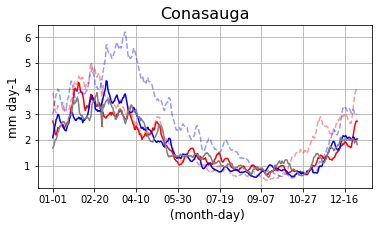

In [244]:
plt.rcParams["figure.figsize"] = (6, 3)

daily_simulations_GFDL_CM4_historical.mean(axis=1).plot(color='r', linestyle='--', alpha=0.4, label='GFDL-CM4')
daily_simulations_GFDL_CM4_historical_bc.mean(axis=1).plot(color='r', label='GFDL-CM4, Bias corrected')

daily_simulations_MPI_ESM1_2_HR_historical.mean(axis=1).plot(color='b' , linestyle='--' , alpha=0.4, label='MPI-ESM1-2-HR')
daily_simulations_MPI_ESM1_2_HR_historical_bc.mean(axis=1).plot(color='b', label='MPI-ESM1-2-HR, Bias corrected')
daily_era5_simulation.mean(axis=1).plot(color='grey', label='ERA5 Simulation')


# daily_observation.mean(axis=1).plot(color='k', label='Observation')
# plt.legend()

# plt.plot(daily_simulations_GFDL_CM4_historical_bc)
plt.grid()
plt.ylabel('mm day-1', fontsize=12)
plt.xlabel(' (month-day)', fontsize=12)
plt.title('Conasauga', fontsize=16)
daily_observation.index[0], daily_era5_simulation.index[0]

In [245]:
cal_df = pd.DataFrame(columns=['ED','nse','lognse', 'nseFDC', 'nse_runoff'])
val_df = pd.DataFrame(columns=['ED','nse','lognse', 'nseFDC', 'nse_runoff'])
for i in range(len(era5_simulation.columns)):
    cal_list = multi_objective(era5_simulation.loc[(era5_simulation.index.year > 1988) & (era5_simulation.index.year < 1999)].iloc[:,i], 
                                                          observation.loc[(observation.index.year > 1988) & (observation.index.year < 1999)].streamflow, ERA5_forcing.prec)
    val_list = multi_objective(era5_simulation.loc[(era5_simulation.index.year >= 1999)].iloc[:,i], 
                                                      observation.loc[(observation.index.year >= 1999)].streamflow, ERA5_forcing.prec)
    cal_df.loc[len(cal_df)] = cal_list
    val_df.loc[len(val_df)] = val_list
print(cal_df.nse.mean(), cal_df.lognse.mean(), cal_df.nseFDC.mean(), cal_df.nse_runoff.mean(),1-cal_df.ED.mean())
print(val_df.nse.mean(), val_df.lognse.mean(), val_df.nseFDC.mean(), val_df.nse_runoff.mean(),1-val_df.ED.mean())

0.18740691781137522 0.6280939900251025 0.8865953987657939 0.16014287705697577 0.38383564555698313
0.18670288784322991 0.5952644516821207 0.8779540171527082 0.3883277950146007 0.44826791153744305


### Cum sum

In [246]:
cumsum_obs = observation.streamflow.groupby(observation.index.strftime("%y")).sum()
cumsum_prec = ERA5_forcing.loc[ERA5_forcing.index.year<=2005].prec.groupby(ERA5_forcing.loc[ERA5_forcing.index.year<=2005].index.strftime("%y")).sum()
cumsum_evap = evaporation.mean(axis=1).groupby(evaporation.index.strftime("%y")).sum()

tot = cumsum_prec -cumsum_evap - cumsum_obs
tot.to_csv('waterbalance_conasauga.csv')
np.sum(tot)

1005.7671773918884

## modelled streamflow 2000

Text(0.5, 0, '')

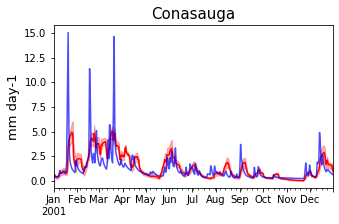

In [247]:
plt.figure(figsize=[5,3])
sim_2000 = era5_simulation.loc[era5_simulation.index.year == 2001]
obs_2000 = observation.loc[observation.index.year == 2001]

sim_2000.mean(axis=1).plot(color='r', label='ERA5 simulated')
obs_2000.mean(axis=1).plot(color='b', label='Observed', alpha=0.7)
plt.fill_between(sim_2000.index, sim_2000.min(axis=1), sim_2000.max(axis=1), color='r', alpha=0.3)
plt.ylabel('mm day-1', fontsize=13)
plt.title('Conasauga', fontsize=15)
plt.xlabel('')
# plt.legend()

('01-01', '01-01')

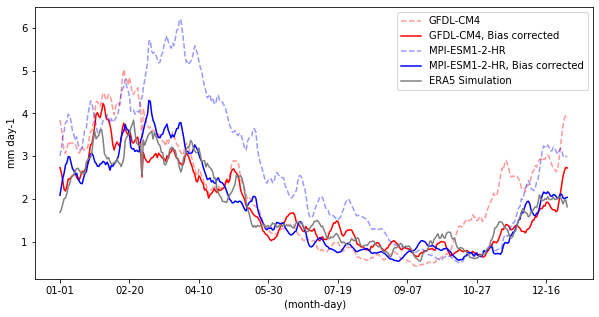

In [248]:
plt.rcParams["figure.figsize"] = (10, 5)

daily_simulations_GFDL_CM4_historical.mean(axis=1).plot(color='r', linestyle='--', alpha=0.4, label='GFDL-CM4')
daily_simulations_GFDL_CM4_historical_bc.mean(axis=1).plot(color='r', label='GFDL-CM4, Bias corrected')

daily_simulations_MPI_ESM1_2_HR_historical.mean(axis=1).plot(color='b' , linestyle='--' , alpha=0.4, label='MPI-ESM1-2-HR')
daily_simulations_MPI_ESM1_2_HR_historical_bc.mean(axis=1).plot(color='b', label='MPI-ESM1-2-HR, Bias corrected')
daily_era5_simulation.mean(axis=1).plot(color='grey', label='ERA5 Simulation')


# daily_observation.mean(axis=1).plot(color='k', label='Observation')
plt.legend()

# plt.plot(daily_simulations_GFDL_CM4_historical_bc)
plt.legend()
plt.ylabel('mm day-1')
plt.xlabel(' (month-day)')
daily_observation.index[0], daily_era5_simulation.index[0]

(0, 6)

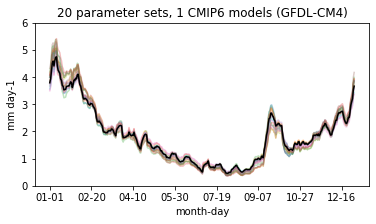

In [353]:
plt.rcParams["figure.figsize"] = (6, 3)
# simulations_all_ssp585
daily_simulations_all_ssp585 = simulations_all_ssp585.loc[simulations_all_ssp585.index.year > 2069].groupby(simulations_all_ssp585.loc[simulations_all_ssp585.index.year > 2069].index.strftime("%m-%d")).mean()
daily_simulations_GFDL_CM4_ssp585_bc = simulations_GFDL_CM4_ssp585_bc.loc[simulations_GFDL_CM4_ssp585_bc.index.year > 2069].groupby(simulations_GFDL_CM4_ssp585_bc.loc[simulations_GFDL_CM4_ssp585_bc.index.year > 2069].index.strftime("%m-%d")).mean()

daily_simulations_GFDL_CM4_ssp585_bc.plot(alpha=0.3, legend=False)
daily_simulations_GFDL_CM4_ssp585_bc.iloc[:,0].plot(legend=False, color='k')
plt.title('20 parameter sets, 1 CMIP6 models (GFDL-CM4)')
plt.ylabel('mm day-1')
plt.xlabel('month-day')
plt.ylim(0,6)


Text(0.5, 0, 'month-day')

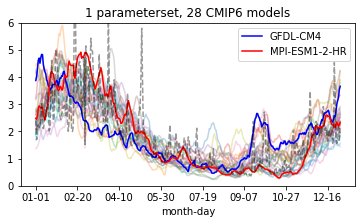

In [356]:
daily_simulations_all_ssp585.plot(alpha=0.3, legend=False, label=None)
daily_simulations_all_ssp585['GFDL-CM4'].plot(alpha=1, color='b', legend=True, label='GFDL-CM4')
daily_simulations_all_ssp585['MPI-ESM1-2-HR'].plot(alpha=1, color='r', legend=True, label='MPI-ESM1-2-HR')
daily_observation.mean(axis=1).plot(color='k',alpha=0.4, linestyle='--', label='Observation')

# plt.legend(loc='best')
plt.ylim(0,6)
plt.title('1 parameterset, 28 CMIP6 models')
# plt.ylabel('mm day-1')
plt.xlabel('month-day')


In [322]:
len(daily_simulations_all_ssp585.columns)

28

('01-01', '01-01')

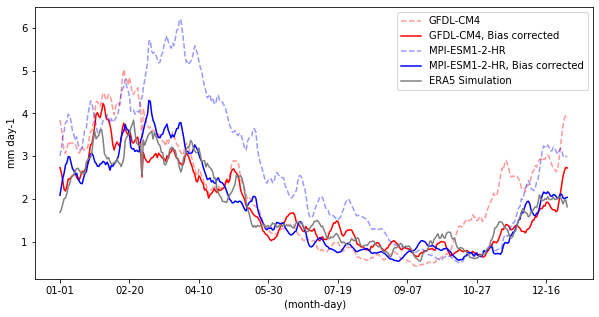

In [258]:
plt.rcParams["figure.figsize"] = (10, 5)

daily_simulations_GFDL_CM4_historical.mean(axis=1).plot(color='r', linestyle='--', alpha=0.4, label='GFDL-CM4')
daily_simulations_GFDL_CM4_historical_bc.mean(axis=1).plot(color='r', label='GFDL-CM4, Bias corrected')

daily_simulations_MPI_ESM1_2_HR_historical.mean(axis=1).plot(color='b' , linestyle='--' , alpha=0.4, label='MPI-ESM1-2-HR')
daily_simulations_MPI_ESM1_2_HR_historical_bc.mean(axis=1).plot(color='b', label='MPI-ESM1-2-HR, Bias corrected')



daily_era5_simulation.mean(axis=1).plot(color='grey', label='ERA5 Simulation')


# daily_observation.mean(axis=1).plot(color='k', label='Observation')
plt.legend()

# plt.plot(daily_simulations_GFDL_CM4_historical_bc)
plt.legend()
plt.ylabel('mm day-1')
plt.xlabel(' (month-day)')
daily_observation.index[0], daily_era5_simulation.index[0]

In [259]:
def create_monthly_boxplots(simulations_hist, simulations_ssp245, simulations_ssp585):
    fig, axarr = plt.subplots(figsize=(9,4))

    hist = simulations_hist.groupby(simulations_hist.index.strftime("%y-%m")).sum()
    hist['mean'] = hist.mean(axis=1)
    hist['month'] = hist.index.str[3:]
    hist.boxplot(by='month', column='mean', ax=axarr, positions=np.array(range(12))*3.0-0.8, sym='', widths=0.6, color='k')

    ssp245 = simulations_ssp245.groupby(simulations_ssp245.index.strftime("%y-%m")).sum()
    ssp245['mean'] = ssp245.mean(axis=1)
    ssp245['month'] = ssp245.index.str[3:]
    ssp245.boxplot(by='month', column='mean', ax=axarr, sym='', positions=np.array(range(12))*3.0, widths=0.6, color='b')

    ssp585 = simulations_ssp585.groupby(simulations_ssp585.index.strftime("%y-%m")).sum()
    ssp585['mean'] = ssp585.mean(axis=1)
    ssp585['month'] = ssp585.index.str[3:]
    ssp585.boxplot(by='month', column='mean', ax=axarr, positions=np.array(range(12))*3.0+0.8, sym='', widths=0.6, color='r')
    
    ticks = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    fig.suptitle('')
    plt.xticks(range(0, 12 * 3, 3), ticks)

Text(0, 0.5, 'mm month-1')

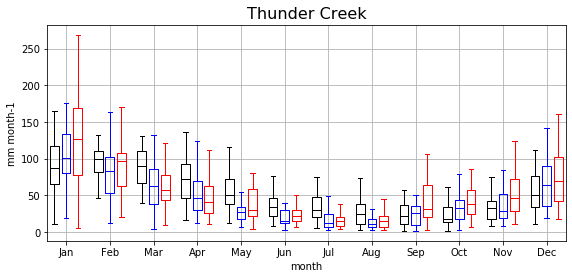

In [260]:
create_monthly_boxplots(simulations_GFDL_CM4_historical_bc, simulations_GFDL_CM4_ssp245_bc,
                    simulations_GFDL_CM4_ssp585_bc)
plt.title('Thunder Creek', fontsize=16)
plt.plot([], 'k', label='Historical')
plt.plot([], 'b', label='SSP245')
plt.plot([], 'r', label='SSP585')
plt.ylabel('mm month-1')
# plt.legend()

## Boxplots

In [261]:
def create_monthly_boxplots(simulations_hist, simulations_ssp245, simulations_ssp585):
    fig, axarr = plt.subplots(figsize=(7,4))

    hist = simulations_hist.groupby(simulations_hist.index.strftime("%y-%m")).sum()
    hist['mean'] = hist.mean(axis=1)
    hist['month'] = hist.index.str[3:]
    hist.boxplot(by='month', column='mean', ax=axarr, positions=np.array(range(12))*3.0-0.8, sym='', widths=0.6, color='k')

    ssp245 = simulations_ssp245.groupby(simulations_ssp245.index.strftime("%y-%m")).sum()
    ssp245['mean'] = ssp245.mean(axis=1)
    ssp245['month'] = ssp245.index.str[3:]
    ssp245.boxplot(by='month', column='mean', ax=axarr, sym='', positions=np.array(range(12))*3.0, widths=0.6, color='b')

    ssp585 = simulations_ssp585.groupby(simulations_ssp585.index.strftime("%y-%m")).sum()
    ssp585['mean'] = ssp585.mean(axis=1)
    ssp585['month'] = ssp585.index.str[3:]
    ssp585.boxplot(by='month', column='mean', ax=axarr, positions=np.array(range(12))*3.0+0.8, sym='', widths=0.6, color='r')
    
    ticks = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    fig.suptitle('')
    plt.xticks(range(0, 12 * 3, 3), ticks)

Text(0.5, 0, '')

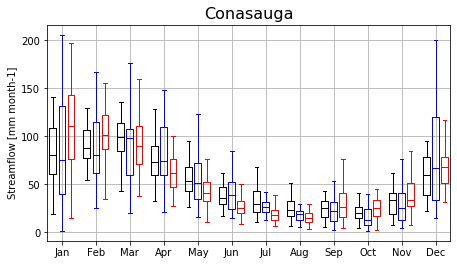

In [262]:
simulations_MPI_ESM1_2_HR_historical_bc = simulations_MPI_ESM1_2_HR_historical_bc.add_suffix('_MPI_ESM1_2_HR')
simulations_MPI_ESM1_2_HR_ssp245_bc = simulations_MPI_ESM1_2_HR_ssp245_bc.add_suffix('_MPI_ESM1_2_HR')
simulations_MPI_ESM1_2_HR_ssp585_bc = simulations_MPI_ESM1_2_HR_ssp585_bc.add_suffix('_MPI_ESM1_2_HR')

hist = pd.concat([simulations_GFDL_CM4_historical_bc, simulations_MPI_ESM1_2_HR_historical_bc], axis=1)
ssp245 = pd.concat([simulations_MPI_ESM1_2_HR_ssp245_bc, simulations_MPI_ESM1_2_HR_ssp245_bc], axis=1)
ssp585 = pd.concat([simulations_GFDL_CM4_ssp585_bc, simulations_MPI_ESM1_2_HR_ssp585_bc], axis=1)

create_monthly_boxplots(hist, ssp245,
                        ssp585)
plt.title('Conasauga', fontsize=16)
plt.plot([], 'k', label='Historical')
plt.plot([], 'b', label='SSP245')
plt.plot([], 'r', label='SSP585')
plt.ylabel('Streamflow [mm month-1]')
# plt.legend()
# plt.ylabel('Streamflow [mm month-1]')
# plt.xticks([])
plt.xlabel('')
# plt.legend()

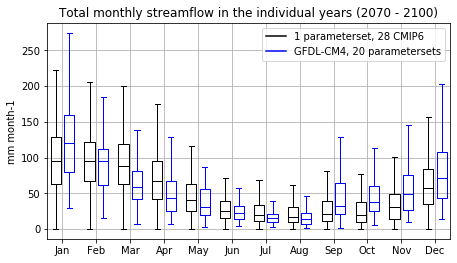

In [362]:
fig, axarr = plt.subplots(figsize=(7,4))

ssp585_models = simulations_all_ssp585.loc[simulations_all_ssp585.index.year > 2069].groupby(simulations_all_ssp585.loc[simulations_all_ssp585.index.year > 2069].index.strftime("%y-%m")).sum()
ssp585_models['month'] = ssp585_models.index.str[3:]
# ssp585_models['mean'] = ssp585_models.mean(axis=1)
ssp585_models = pd.melt(ssp585_models, id_vars=['month'])
ssp585_models.boxplot(by='month', column='value', ax=axarr, positions=np.array(range(12))*2.0-0.4, sym='', widths=0.6, color='k')

# ssp585_parameters_mpi = simulations_MPI_ESM1_2_HR_ssp585_bc.groupby(simulations_MPI_ESM1_2_HR_ssp585_bc.index.strftime("%y-%m")).mean()
# # ssp585_parameters['mean'] = ssp585_parameters.mean(axis=1)
# ssp585_parameters_mpi['month'] = ssp585_parameters_mpi.index.str[3:]
# ssp585_parameters_mpi = pd.melt(ssp585_parameters_mpi, id_vars=['month'])
# ssp585_parameters_mpi.boxplot(by='month', column='value', ax=axarr, positions=np.array(range(12))*2.0+0.4, sym='', widths=0.6, color='r')

ssp585_parameters_gfdl = simulations_GFDL_CM4_ssp585_bc.loc[simulations_GFDL_CM4_ssp585_bc.index.year > 2069].groupby(simulations_GFDL_CM4_ssp585_bc.loc[simulations_GFDL_CM4_ssp585_bc.index.year > 2069].index.strftime("%y-%m")).sum()
# ssp585_parameters['mean'] = ssp585_parameters.mean(axis=1)
ssp585_parameters_gfdl['month'] = ssp585_parameters_gfdl.index.str[3:]
ssp585_parameters_gfdl = pd.melt(ssp585_parameters_gfdl, id_vars=['month'])
ssp585_parameters_gfdl.boxplot(by='month', column='value', ax=axarr, positions=np.array(range(12))*2.0+0.4, sym='', widths=0.6, color='b')

ticks = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
fig.suptitle('')
plt.title('Total monthly streamflow in the individual years (2070 - 2100)')
plt.plot([], 'k', label='1 parameterset, 28 CMIP6')
plt.plot([], 'b', label='GFDL-CM4, 20 parametersets')
# plt.plot([], 'r', label='MPI_ESM1_2_HR, 20 parametersets')
plt.ylabel('mm month-1')
plt.legend()
plt.xlabel('')
plt.xticks(range(0, 12 * 2, 2), ticks);

In [363]:
ssp585_models, ssp585_parameters_gfdl


(      month       variable       value
 0        01  ACCESS-ESM1-5   56.720144
 1        02  ACCESS-ESM1-5  135.368877
 2        03  ACCESS-ESM1-5  193.706583
 3        04  ACCESS-ESM1-5  129.684407
 4        05  ACCESS-ESM1-5   47.837444
 ...     ...            ...         ...
 10075    08        TaiESM1    0.000000
 10076    09        TaiESM1    0.000000
 10077    10        TaiESM1    0.000000
 10078    11        TaiESM1    0.000000
 10079    12        TaiESM1    0.000000
 
 [10080 rows x 3 columns],
      month       variable       value
 0       01   simulation_1  146.949128
 1       02   simulation_1   90.351288
 2       03   simulation_1   80.719787
 3       04   simulation_1   54.133632
 4       05   simulation_1   34.721079
 ...    ...            ...         ...
 6475    08  simulation_18    9.029030
 6476    09  simulation_18   42.188464
 6477    10  simulation_18   24.754992
 6478    11  simulation_18   17.764504
 6479    12  simulation_18   51.458607
 
 [6480 rows x 3 colum

In [265]:
def relative_change_monthly(reference, future):
    months = np.arange(1,13)
    index = np.arange(1,13)
    change = []

    for i in range(len(months)):
        hist = reference.loc[reference.index.month == months[i]].mean(axis=1).sum()
        projection = future.loc[future.index.month == months[i]].mean(axis=1).sum()
        rel_change = (projection-hist) / hist * 100
        change.append([index[i],rel_change])
    return change 

In [266]:
simulations_MPI_ESM1_2_HR_historical_bc = simulations_MPI_ESM1_2_HR_historical_bc.add_suffix('_MPI_ESM1_2_HR')
simulations_MPI_ESM1_2_HR_ssp245_bc = simulations_MPI_ESM1_2_HR_ssp245_bc.add_suffix('_MPI_ESM1_2_HR')
simulations_MPI_ESM1_2_HR_ssp585_bc = simulations_MPI_ESM1_2_HR_ssp585_bc.add_suffix('_MPI_ESM1_2_HR')

hist = pd.concat([simulations_GFDL_CM4_historical_bc, simulations_MPI_ESM1_2_HR_historical_bc], axis=1)
ssp245 = pd.concat([simulations_MPI_ESM1_2_HR_ssp245_bc, simulations_MPI_ESM1_2_HR_ssp245_bc], axis=1)
ssp585 = pd.concat([simulations_GFDL_CM4_ssp585_bc, simulations_MPI_ESM1_2_HR_ssp585_bc], axis=1)

hist_prec = pd.concat([hist_gfdl_forcing.prec, hist_mpi_forcing.prec], axis=1)
ssp245_prec = pd.concat([ssp245_gfdl_forcing.prec, ssp245_mpi_forcing.prec], axis=1)
ssp585_prec = pd.concat([ssp585_gfdl_forcing.prec, ssp585_mpi_forcing.prec], axis=1)

hist_temp = pd.concat([hist_gfdl_forcing.temp, hist_mpi_forcing.temp], axis=1)
ssp245_temp = pd.concat([ssp245_gfdl_forcing.temp, ssp245_mpi_forcing.temp], axis=1)
ssp585_temp = pd.concat([ssp585_gfdl_forcing.temp, ssp585_mpi_forcing.temp], axis=1)

relative_change_streamflow_ssp245 = relative_change_monthly(hist, ssp245)
relative_change_streamflow_ssp585 = relative_change_monthly(hist, ssp585)

relative_change_prec_ssp245 = relative_change_monthly(hist_prec, ssp245_prec)
relative_change_prec_ssp585 = relative_change_monthly(hist_prec, ssp585_prec)

relative_change_temp_ssp245 = relative_change_monthly(hist_temp, ssp245_temp)
relative_change_temp_ssp585 = relative_change_monthly(hist_temp, ssp585_temp)

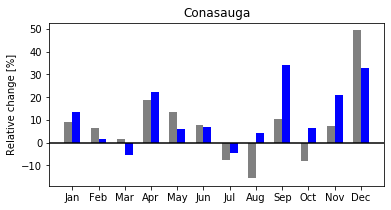

In [267]:
plt.figure(figsize=[6,3])

x1,y1 = zip(*relative_change_streamflow_ssp245)
x2,y2 = zip(*relative_change_prec_ssp245)
# x3,y3 = zip(*relative_change_temp_ssp585)

plt.bar(np.array(x1)-0.15, y1, width = 0.3, label='Streamflow', color='grey')
plt.bar(np.array(x2)+0.15, y2, width = 0.3, label='Precipitation', color='blue')
# plt.bar(np.array(x3)+0.2, y3, width = 0.2, label='Temperature', color='r')
#setting the xticks. Note x1 and x2 are tuples, thus + is concatenation
plt.xticks(range(min(x1+x2), max(x1+x2)+1)) 
# plt.grid()
plt.axhline(0, color='k')
plt.title('Conasauga')
# plt.ylim((-50,120))
plt.ylabel('Relative change [%]')
# plt.xticks([1, 2, 3, 4], ['Winter', 'Spring', 'Summer', 'Autumn'])
# plt.legend()
# plt.ylim((-70,260))
ticks = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(range(1, 13), ticks)

plt.show()

In [37]:
months = np.arange(1,13)
index = np.arange(1,13)
change = []

for i in range(len(months)):
    ref = hist_temp.loc[hist_temp.index.month == months[i]].mean(axis=1).mean()
    projection = ssp245_temp.loc[ssp245_temp.index.month == months[i]].mean(axis=1).mean()
    change.append(projection-ref)

x, y = zip(*relative_change_streamflow_ssp245)
x, dprec = zip(*relative_change_prec_ssp245)

output = pd.DataFrame({'streamflow_change': y, 'dprec': dprec, 'dT': change})

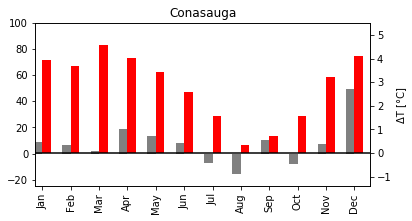

In [59]:
fig = plt.figure(figsize=[6,3]) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.3

output.streamflow_change.plot(kind='bar', color='grey', ax=ax, width=width, position=1)
# plt.axhline(0)
output.dT.plot(kind='bar', color='r', ax=ax2, width=width, position=0,  label='Temperature')

# ax.set_ylabel('Relative change in streamflow [%]')
ax2.set_ylabel('ΔT [°C]')# plt.grid()
# plt.plot(y=0)
# ax2.set_yticks(np.linspace(ax.get_yticks()[0], ax.get_yticks()[-1], len(ax.get_yticks())))
ax2.set_ylim((-1.4, 5.5))
ax.set_ylim((-25, 100))
ticks = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(range(0, 12), ticks)
plt.axhline(0, color='k')
# plt.legend()
plt.title('Conasauga')
plt.show()

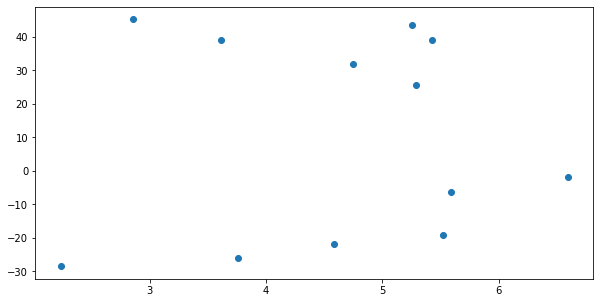

In [26]:
months = np.arange(1,13)
index = np.arange(1,13)
change = []

for i in range(len(months)):
    ref = hist_temp.loc[hist_temp.index.month == months[i]].mean(axis=1).mean()
    projection = ssp585_temp.loc[ssp585_temp.index.month == months[i]].mean(axis=1).mean()
    change.append(projection-ref)

x, y = zip(*relative_change_streamflow_ssp585)

plt.plot(change,y, 'o')

In [27]:
months = np.arange(1,13)
index = np.arange(1,13)
change = []

for i in range(len(months)):
    ref = hist_temp.loc[hist_temp.index.month == months[i]].mean(axis=1).mean()
    projection = ssp585_temp.loc[ssp585_temp.index.month == months[i]].mean(axis=1).mean()
    change.append(projection-ref)

x, y = zip(*relative_change_streamflow_ssp585)
x, dprec = zip(*relative_change_prec_ssp585)

output = pd.DataFrame({'streamflow_change': y, 'dprec': dprec, 'dT': change})

output.to_csv('streamflow_vs_temp_conasauga.csv')
# plt.plot(change,y, 'o')
output

,streamflow_change,dprec,dT
0,43.498029,34.869094,5.255233
1,25.712746,22.994126,5.286033
2,-1.676713,4.056078,6.592263
3,-6.167389,10.471550,5.589909
4,-19.076688,8.259982,5.516884
5,-21.955409,12.859970,4.581066
6,-26.098642,0.298371,3.758156
7,-28.522042,11.421388,2.234539
8,45.274688,40.228834,2.853498
9,39.205183,18.165690,3.610847


## FDC

Text(0.5, 1.0, 'Conasauga')

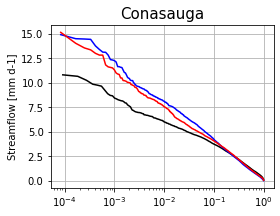

In [61]:
plt.figure(figsize=[4,3])
SortedQ_hist, ExcProb_hist = flowdurationcurve(hist.loc[hist.index.year > hist.index.year[1]].mean(axis=1).values)
SortedQ_ssp245, ExcProb_ssp245 = flowdurationcurve(ssp245.loc[ssp245.index.year > ssp245.index.year[1]].mean(axis=1).values)
SortedQ_ssp585, ExcProb_ssp585 = flowdurationcurve(ssp585.loc[ssp585.index.year > ssp585.index.year[1]].mean(axis=1).values)

plt.plot(ExcProb_hist, SortedQ_hist, color='k', label='Historical')
plt.plot(ExcProb_ssp245, SortedQ_ssp245, color='b', label='SSP245')
plt.plot(ExcProb_ssp585, SortedQ_ssp585, color='r', label='SSP585')


plt.xscale('log')
plt.grid()
# plt.legend()
plt.ylabel('Streamflow [mm d-1]')
# plt.xlabel('Exceedance probability [-]')
plt.title('Conasauga', fontsize=15)

## Relative change seasonal prec + temp

In [29]:
prec_hist_bothmodels = (hist_gfdl_forcing.prec.groupby(hist_gfdl_forcing.index.month).mean() +hist_mpi_forcing.prec.groupby(hist_mpi_forcing.index.month).mean()) / 2
prec_ssp245_bothmodels = (ssp245_gfdl_forcing.prec.groupby(ssp245_gfdl_forcing.index.month).mean() +ssp245_mpi_forcing.prec.groupby(ssp245_mpi_forcing.index.month).mean()) / 2
prec_ssp585_bothmodels = (ssp585_gfdl_forcing.prec.groupby(ssp585_gfdl_forcing.index.month).mean() +ssp585_mpi_forcing.prec.groupby(ssp585_mpi_forcing.index.month).mean()) / 2


rel_dif_prec_ssp245 = (prec_ssp245_bothmodels - prec_hist_bothmodels) / prec_hist_bothmodels*100
rel_dif_prec_ssp585 = (prec_ssp585_bothmodels - prec_hist_bothmodels) / prec_hist_bothmodels*100



temp_hist_bothmodels = (hist_gfdl_forcing.temp.groupby(hist_gfdl_forcing.index.month).mean() +hist_mpi_forcing.temp.groupby(hist_mpi_forcing.index.month).mean()) / 2
temp_ssp245_bothmodels = (ssp245_gfdl_forcing.temp.groupby(ssp245_gfdl_forcing.index.month).mean() +ssp245_mpi_forcing.temp.groupby(ssp245_mpi_forcing.index.month).mean()) / 2
temp_ssp585_bothmodels = (ssp585_gfdl_forcing.temp.groupby(ssp585_gfdl_forcing.index.month).mean() +ssp585_mpi_forcing.temp.groupby(ssp585_mpi_forcing.index.month).mean()) / 2

abs_dif_temp_ssp245 = (temp_ssp245_bothmodels - temp_hist_bothmodels) 
abs_dif_temp_ssp585 = (temp_ssp585_bothmodels - temp_hist_bothmodels) 

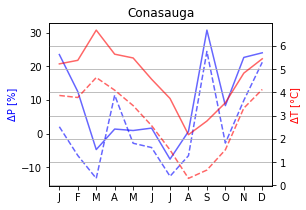

In [30]:
fig = plt.figure(figsize=[4,3]) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes

plt.plot(rel_dif_prec_ssp245, color='b', linestyle='--', alpha=0.6)
plt.plot(rel_dif_prec_ssp585, color='b', alpha=0.6)


ax2=ax.twinx()
ax2.plot(abs_dif_temp_ssp245,color="r", linestyle='--', alpha=0.6, label='SSP245')
ax2.plot(abs_dif_temp_ssp585,color="r", alpha=0.6, label='SSP585')
ax2.set_ylabel("ΔT [°C]",color="r")
ax.set_ylabel('ΔP [%]', color='b')
ticks = ['J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D']
plt.xticks(range(1, 13), ticks)
plt.title('Conasauga',fontsize=12)
plt.grid()
plt.show()

In [31]:
np.array(range(4))+0.1

array([0.1, 1.1, 2.1, 3.1])

## Changes in extremes

In [376]:
hist_14day = hist.mean(axis=1).groupby(pd.Grouper(freq='7D')).mean()
ssp245_14day = ssp245.mean(axis=1).groupby(pd.Grouper(freq='7D')).mean()
ssp585_14day = ssp585.mean(axis=1).groupby(pd.Grouper(freq='7D')).mean()

Text(0.5, 1.0, 'Conasauga')

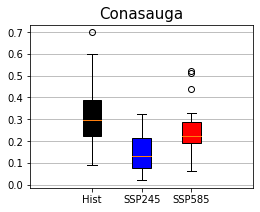

In [372]:
min_hist_14day = hist_14day.loc[hist_14day.index.year> hist_14day.index[0].year].groupby(hist_14day.loc[hist_14day.index.year> hist_14day.index[0].year].index.strftime("%y")).min()
min_ssp245_14day = ssp245_14day.loc[ssp245_14day.index.year> ssp245_14day.index[0].year].groupby(ssp245_14day.loc[ssp245_14day.index.year> ssp245_14day.index[0].year].index.strftime("%y")).min()
min_ssp585_14day = ssp585_14day.loc[ssp585_14day.index.year> ssp585_14day.index[0].year].groupby(ssp585_14day.loc[ssp585_14day.index.year> ssp585_14day.index[0].year].index.strftime("%y")).min()


plt.figure(figsize=[4,3])

bplot1 = plt.boxplot(min_hist_14day, patch_artist=True,  positions=np.array(range(1))*3.0-0.4)
bplot2 = plt.boxplot(min_ssp245_14day, patch_artist=True,  positions=np.array(range(1))*3.0)
bplot3 = plt.boxplot(min_ssp585_14day, patch_artist=True, positions=np.array(range(1))*3.0+0.4)

colors = ['black', 'blue', 'red']
for patch, color in zip(bplot1['boxes'], colors):
    patch.set_facecolor('black') 
for patch, color in zip(bplot2['boxes'], colors):
    patch.set_facecolor('blue') 
for patch, color in zip(bplot3['boxes'], colors):
    patch.set_facecolor('red') 
    
ticks = ['Hist', 'SSP245', 'SSP585']
plt.xticks([-0.4, 0, 0.4], ticks)
plt.grid(axis='y')
plt.title('Conasauga', fontsize=15)
# plt.ylabel('min streamflow [mm day-1]')

In [373]:
(min_ssp585_14day.median() - min_hist_14day.median()) / min_hist_14day.median() * 100

-24.562855721127388

Text(0.5, 1.0, 'Conasauga')

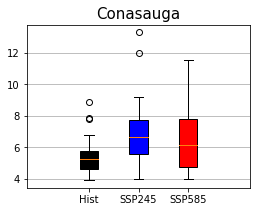

In [374]:
max_hist_14day = hist_14day.loc[hist_14day.index.year> hist_14day.index[0].year].groupby(hist_14day.loc[hist_14day.index.year> hist_14day.index[0].year].index.strftime("%y")).max()
max_ssp245_14day = ssp245_14day.loc[ssp245_14day.index.year> ssp245_14day.index[0].year].groupby(ssp245_14day.loc[ssp245_14day.index.year> ssp245_14day.index[0].year].index.strftime("%y")).max()
max_ssp585_14day = ssp585_14day.loc[ssp585_14day.index.year> ssp585_14day.index[0].year].groupby(ssp585_14day.loc[ssp585_14day.index.year> ssp585_14day.index[0].year].index.strftime("%y")).max()


plt.figure(figsize=[4,3])

bplot1 = plt.boxplot(max_hist_14day, patch_artist=True,  positions=np.array(range(1))*3.0-0.4)
bplot2 = plt.boxplot(max_ssp245_14day, patch_artist=True,  positions=np.array(range(1))*3.0)
bplot3 = plt.boxplot(max_ssp585_14day, patch_artist=True, positions=np.array(range(1))*3.0+0.4)

for patch, color in zip(bplot1['boxes'], colors):
    patch.set_facecolor('black') 
for patch, color in zip(bplot2['boxes'], colors):
    patch.set_facecolor('blue') 
for patch, color in zip(bplot3['boxes'], colors):
    patch.set_facecolor('red') 
    
ticks = ['Hist', 'SSP245', 'SSP585']
plt.xticks([-0.4, 0, 0.4], ticks)
plt.grid(axis='y')
plt.title('Conasauga', fontsize=15)
# plt.ylabel('max streamflow [mm day-1]')

In [36]:
(max_ssp245_14day.median() - max_hist_14day.median()) / max_hist_14day.median() * 100, (max_ssp585_14day.median() - max_hist_14day.median()) / max_hist_14day.median() * 100

(27.314743981736385, 17.237581798044324)

### Timing

In [381]:
hist_yearly_max = pd.to_datetime(pd.DataFrame(hist_14day.loc[(hist_14day.index.year>hist_14day.index[0].year)]).resample('1y')[0].idxmax().values)
hist_yearly_max_doy = np.array([dt.timetuple().tm_yday for dt in hist_yearly_max])
hist_max_doy_stat = [stats.circmean(hist_yearly_max_doy, high=365), stats.circstd(hist_yearly_max_doy, high=365)]

ssp245_yearly_max = pd.to_datetime(pd.DataFrame(ssp245_14day.loc[(ssp245_14day.index.year>ssp245_14day.index[0].year)]).resample('1y')[0].idxmax().values)
ssp245_yearly_max_doy = np.array([dt.timetuple().tm_yday for dt in ssp245_yearly_max])
ssp245_max_doy_stat = [stats.circmean(ssp245_yearly_max_doy, high=365), stats.circstd(ssp245_yearly_max_doy, high=365)]

ssp585_yearly_max = pd.to_datetime(pd.DataFrame(ssp585_14day.loc[(ssp585_14day.index.year>ssp585_14day.index[0].year)]).resample('1y')[0].idxmax().values)
ssp585_yearly_max_doy = np.array([dt.timetuple().tm_yday for dt in ssp585_yearly_max])
ssp585_max_doy_stat = [stats.circmean(ssp585_yearly_max_doy, high=365), stats.circstd(ssp585_yearly_max_doy, high=365)]
print(hist_max_doy_stat, ssp245_max_doy_stat, ssp585_max_doy_stat)

[58.389915525211705, 34.968189552244766] [46.0348353094447, 49.34060728271416] [20.343236530003736, 32.20978831301673]


In [38]:
hist_yearly_min = pd.to_datetime(pd.DataFrame(hist_14day.loc[(hist_14day.index.year>hist_14day.index[0].year)]).resample('1y')[0].idxmin().values)
hist_yearly_min_doy = np.array([dt.timetuple().tm_yday for dt in hist_yearly_min])
hist_min_doy_stat = [stats.circmean(hist_yearly_min_doy, high=365), stats.circstd(hist_yearly_min_doy, high=365)]

ssp245_yearly_min = pd.to_datetime(pd.DataFrame(ssp245_14day.loc[(ssp245_14day.index.year>ssp245_14day.index[0].year)]).resample('1y')[0].idxmin().values)
ssp245_yearly_min_doy = np.array([dt.timetuple().tm_yday for dt in ssp245_yearly_min])
ssp245_min_doy_stat = [stats.circmean(ssp245_yearly_min_doy, high=365), stats.circstd(ssp245_yearly_min_doy, high=365)]

ssp585_yearly_min = pd.to_datetime(pd.DataFrame(ssp585_14day.loc[(ssp585_14day.index.year>ssp585_14day.index[0].year)]).resample('1y')[0].idxmin().values)
ssp585_yearly_min_doy = np.array([dt.timetuple().tm_yday for dt in ssp585_yearly_min])
ssp585_min_doy_stat = [stats.circmean(ssp585_yearly_min_doy, high=365), stats.circstd(ssp585_yearly_min_doy, high=365)]
print(hist_min_doy_stat, ssp245_min_doy_stat, ssp585_min_doy_stat)

[276.43071244384413, 36.00731021521249] [282.55388890894403, 41.8575771317574] [243.9089955271476, 40.6587662414735]


In [39]:
reference = stats.circmean(hist_yearly_min_doy, high=365)
delta_ssp245 = stats.circmean(ssp245_yearly_min_doy, high=365) - reference
delta_ssp585 = stats.circmean(ssp585_yearly_min_doy, high=365) - reference

delta_ssp245, delta_ssp585

(6.1231764650999025, -32.52171691669653)

In [40]:
reference = stats.circmean(hist_yearly_max_doy, high=365)
delta_ssp245 = stats.circmean(ssp245_yearly_max_doy, high=365) - reference
delta_ssp585 = stats.circmean(ssp585_yearly_max_doy, high=365) - reference

delta_ssp245, delta_ssp585

(-12.355080215767003, -38.04667899520797)

## Yearly runoff

In [385]:
daily_simulations_all_ssp585.index = pd.to_datetime(daily_simulations_all_ssp585.index)
# rolling_7_day = daily_simulations_all_ssp585.mean(axis=1).groupby(pd.Grouper(freq='7D')).mean()

OutOfBoundsDatetime: Out of bounds nanosecond timestamp: 1-01-01 00:00:00

In [434]:
daily_simulations_gfdl = daily_simulations_all_ssp585['GFDL-CM4']
daily_simulations_mpi = daily_simulations_all_ssp585['MPI-ESM1-2-HR']




daily_simulations_all_ssp585.index = validation_simulation.loc[validation_simulation.index.year == 2004].index
daily_simulations_gfdl.index = validation_simulation.loc[validation_simulation.index.year == 2004].index
daily_simulations_mpi.index = validation_simulation.loc[validation_simulation.index.year == 2004].index
daily_observation.index = validation_simulation.loc[validation_simulation.index.year == 2004].index

In [441]:
flow_7_day_allmodels = daily_simulations_all_ssp585.groupby(pd.Grouper(freq='7D')).mean()
flow_7_day_mpi = daily_simulations_mpi.groupby(pd.Grouper(freq='7D')).mean()
flow_7_day_gfld = daily_simulations_gfdl.groupby(pd.Grouper(freq='7D')).mean()
flow_7_day_obs = daily_observation.groupby(pd.Grouper(freq='7D')).mean()

# flow_7_day_gfld.index = pd.to_datetime(flow_7_day_gfld.index)
# flow_7_day_mpi.index = pd.to_datetime(flow_7_day_mpi.index)


doy_obs = np.array([dt.timetuple().tm_yday for dt in flow_7_day_obs.idxmax()])
doy_mpi = flow_7_day_mpi.idxmax().timetuple().tm_yday
doy_gfld = flow_7_day_gfld.idxmax().timetuple().tm_yday
doy_allmodels = np.array([dt.timetuple().tm_yday for dt in flow_7_day_allmodels.idxmax()])

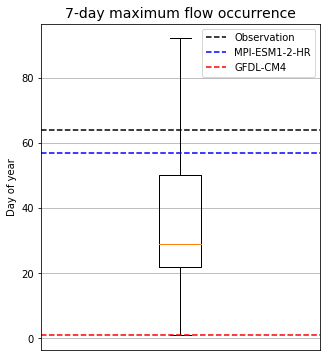

In [481]:
plt.figure(figsize=[5,6])
plt.boxplot(doy)
plt.axhline(doy_obs, linestyle='--', color='k', label='Observation')
plt.axhline(doy_mpi, linestyle='--', color='b', label='MPI-ESM1-2-HR')
plt.axhline(doy_gfld, linestyle='--', color='r', label='GFDL-CM4')
plt.grid(axis='y')
plt.ylabel('Day of year')
plt.title('7-day maximum flow occurrence', fontsize=14)
plt.tick_params(
    axis='x',          
    which='both',      
    bottom=False,      
    top=False,         
    labelbottom=False) 
plt.legend()

In [405]:
daily_simulations_all_ssp585['GFDL-CM4'].plot(alpha=1, color='b', legend=True, label='GFDL-CM4')
daily_simulations_all_ssp585['MPI-ESM1-2-HR'].plot(alpha=1, color='r', legend=True, label='MPI-ESM1-2-HR')
daily_observation.mean(axis=1).plot(color='k',alpha=0.4, linestyle='--', label='Observation')

array([50,  1, 22, 36, 64, 43, 92, 36,  8, 29, 64, 29,  1, 22, 50, 15, 22,
       92, 29, 50, 29, 57, 43, 50, 29, 29, 15, 22])

In [487]:
flow_7_day_gfld.idxmax()
flow_7_day_gfld

2004-01-01    4.392274
2004-01-08    4.376453
2004-01-15    3.657146
2004-01-22    3.768087
2004-01-29    4.026736
2004-02-05    3.619249
2004-02-12    3.183666
2004-02-19    2.948411
2004-02-26    2.403249
2004-03-04    2.052659
2004-03-11    2.076915
2004-03-18    2.049255
2004-03-25    2.000478
2004-04-01    1.894905
2004-04-08    1.878382
2004-04-15    1.537502
2004-04-22    1.826385
2004-04-29    1.407065
2004-05-06    1.430612
2004-05-13    1.218788
2004-05-20    1.087231
2004-05-27    1.161249
2004-06-03    0.928745
2004-06-10    1.076511
2004-06-17    0.906538
2004-06-24    0.698979
2004-07-01    0.715502
2004-07-08    0.760910
2004-07-15    0.748394
2004-07-22    0.711268
2004-07-29    0.489239
2004-08-05    0.653918
2004-08-12    0.626192
2004-08-19    0.585133
2004-08-26    0.656942
2004-09-02    0.963803
2004-09-09    1.140424
2004-09-16    2.198973
2004-09-23    2.405215
2004-09-30    2.236791
2004-10-07    1.498615
2004-10-14    1.374361
2004-10-21    1.584564
2004-10-28 

In [484]:
daily_simulations_gfdl.head(20)

2004-01-01    3.873961
2004-01-02    4.020015
2004-01-03    4.313104
2004-01-04    4.616059
2004-01-05    4.698129
2004-01-06    4.510074
2004-01-07    4.714574
2004-01-08    4.832496
2004-01-09    4.826594
2004-01-10    4.473280
2004-01-11    4.302320
2004-01-12    4.192667
2004-01-13    4.116932
2004-01-14    3.890881
2004-01-15    3.842992
2004-01-16    3.681467
2004-01-17    3.656030
2004-01-18    3.520330
2004-01-19    3.579097
2004-01-20    3.606795
Name: GFDL-CM4, dtype: float64